# Importing all the use libraries and algorithms that is to be used in the ford dataset along with evaulating metrics

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split data into traning and testing dataset
import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Importing Kaggle Ford car Data set from github 

In [205]:
!git clone "https://github.com/Birajpokharel11/AI-Ford-data.git"

fatal: destination path 'AI-Ford-data' already exists and is not an empty directory.


In [206]:
## We can see that

In [207]:
!ls

AI-Ford-data  sample_data


In [208]:
!ls


AI-Ford-data  sample_data


# Reading the Kaggle dataset using Pandas

## Analysing the number of attribute in the ford csv file

In [209]:
car_dataset = pd.read_csv('AI-Ford-data/ford.csv')
cardataset = car_dataset.copy()

cardataset.columns.tolist()

['model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

## Viewing Certain samples from the dataset top 5 using .head()

In [210]:
car_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Getting some information about the dataset

In [211]:

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


## Checking Dataset for Null values: As the below data shows we have no null values in any of the attributes in ford dataset

---



In [212]:
#checking for null values
car_dataset.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Checking for Duplicates value and removing them

In [213]:
# Before Removing Dupicate value
print('Before removing duplicate values', car_dataset.duplicated().sum())


Before removing duplicate values 154


In [214]:
#After Removing Duplicated value
car_dataset = car_dataset[~car_dataset.duplicated()]
print('After removing duplicate values', car_dataset.duplicated().sum())


After removing duplicate values 0


## car_dataset.describe() is used to calculate various statistics summary

In [215]:
car_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,12269.556310,23381.146362,113.315012,57.908696,1.350623
std,2.052039,4736.285417,19419.011045,62.034603,10.132696,0.432581
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11288.000000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31098.500000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


## Checking Car_dataset['Model'] information

In [216]:
car_dataset['model'].info

<bound method Series.info of 0         Fiesta
1          Focus
2          Focus
3         Fiesta
4         Fiesta
          ...   
17961      B-MAX
17962      B-MAX
17963      Focus
17964         KA
17965      Focus
Name: model, Length: 17812, dtype: object>

## Plotting Model vs Model Count using Seaborn and matplotlib

Text(0.5, 1.0, 'Model numbers')

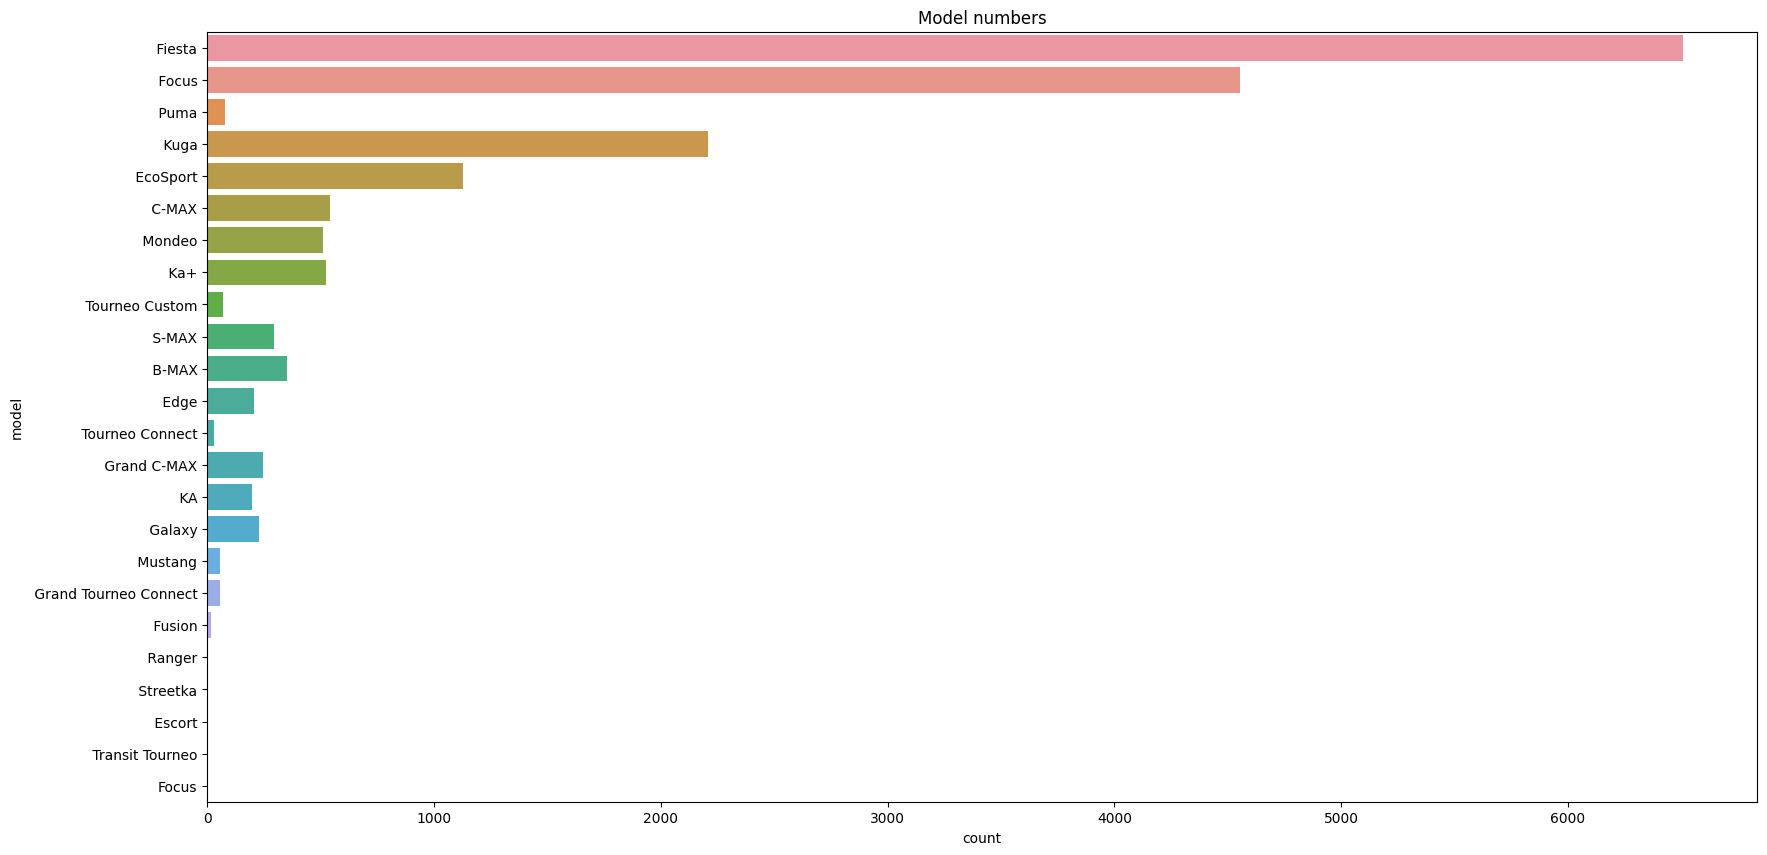

In [217]:
## Exploring caterogical data and numerical data using count plot starting with model types
plt.figure(figsize=(20,10))
sns.countplot(y="model", data=car_dataset)
plt.title("Model numbers")


## Information about each car model count

In [218]:
car_dataset['model'].value_counts()

 Fiesta                   6509
 Focus                    4555
 Kuga                     2208
 EcoSport                 1127
 C-MAX                     542
 Ka+                       523
 Mondeo                    512
 B-MAX                     350
 S-MAX                     294
 Grand C-MAX               247
 Galaxy                    227
 Edge                      205
 KA                        197
 Puma                       79
 Tourneo Custom             69
 Grand Tourneo Connect      57
 Mustang                    57
 Tourneo Connect            32
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

## Plotting Year vs Year Count using Seaborn and matplotlib

Text(0.5, 1.0, 'Years')

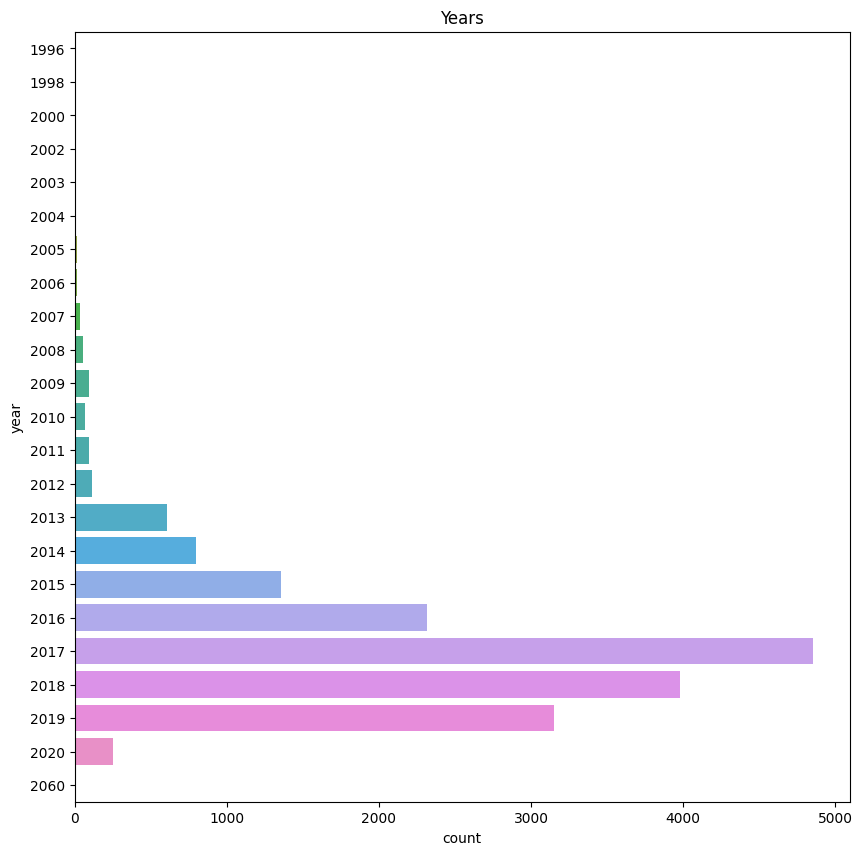

In [219]:
plt.figure(figsize=(10,10))
sns.countplot(y="year", data=car_dataset)
plt.title("Years")


## Information about each Year value Count

In [220]:
year_counts = car_dataset['year'].value_counts()
year_counts

2017    4854
2018    3982
2019    3152
2016    2314
2015    1355
2014     799
2013     606
2020     252
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

## Plotting Transmission vs Transmission count using Seaborn and matplotlib

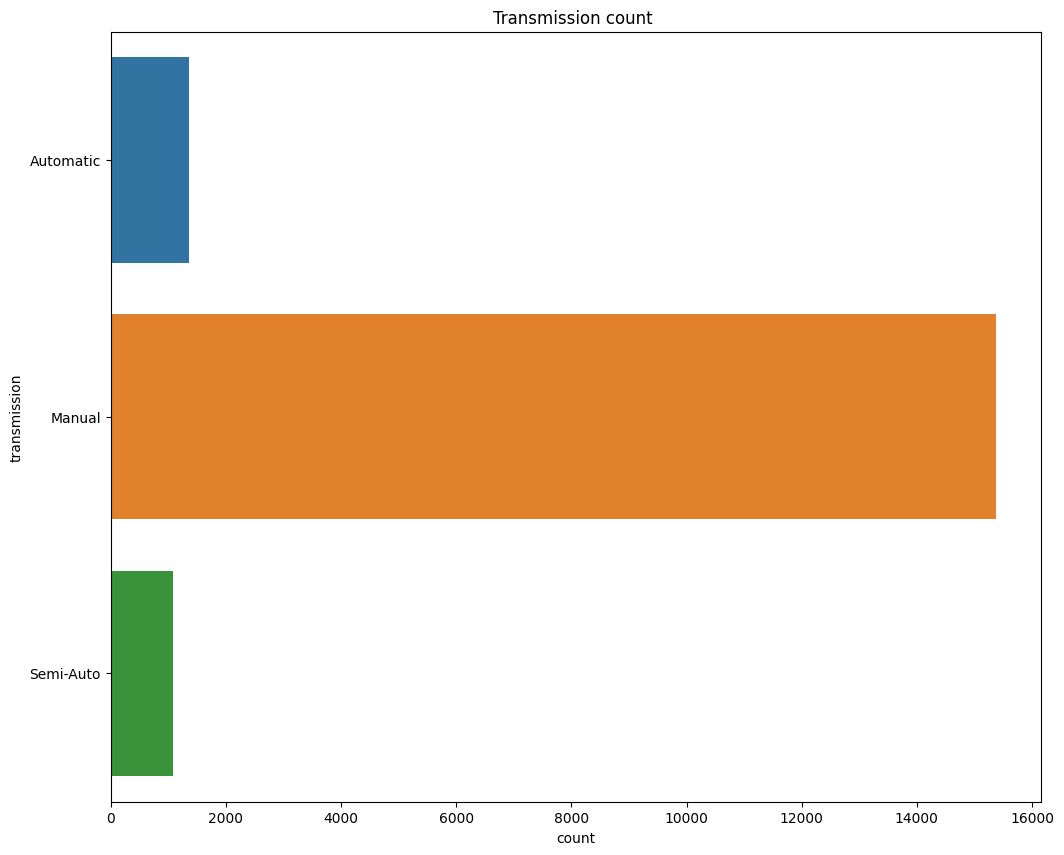

In [221]:
## Exploring caterogical data and numerical data using count plot  Transmission 

plt.figure(figsize=(12,10))
sns.countplot(y="transmission", data=car_dataset)
plt.title("Transmission count ")
plt.show()


## Information about each Transmission Value count

In [222]:
Transmission_counts = car_dataset['transmission'].value_counts()
Transmission_counts

Manual       15383
Automatic     1354
Semi-Auto     1075
Name: transmission, dtype: int64

## Exploring categorical data and numerical data using count plot  with Fuel Type

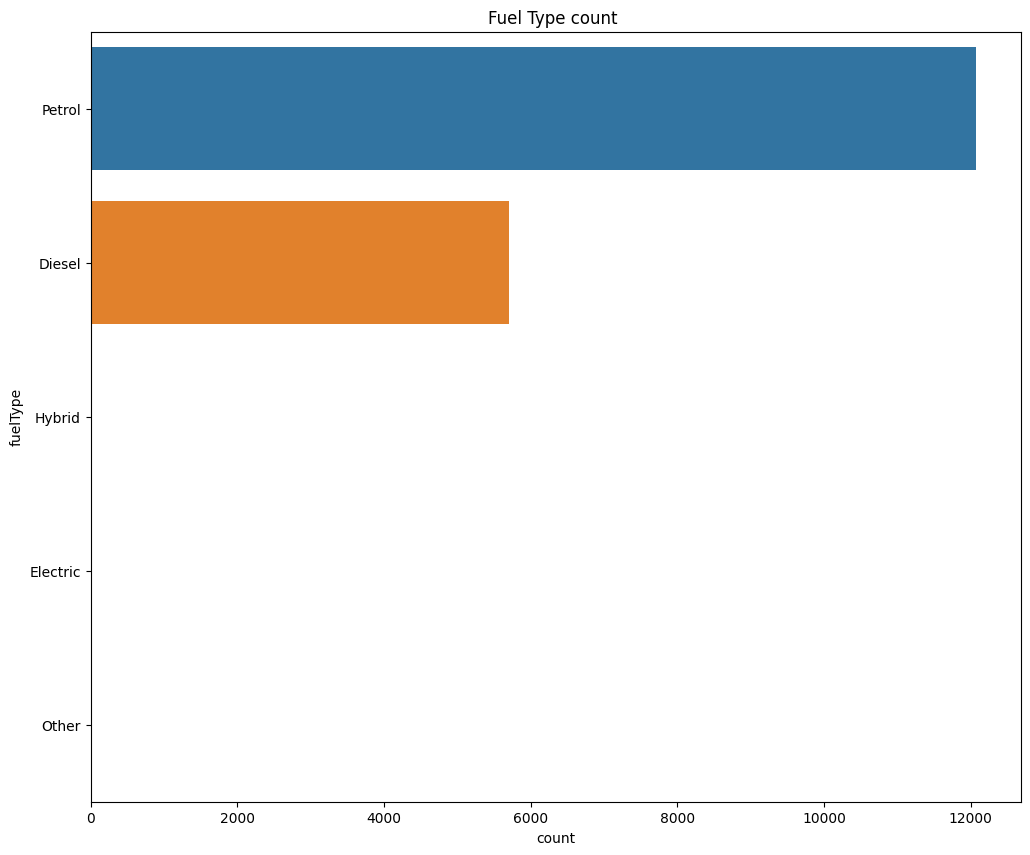

In [223]:

plt.figure(figsize=(12,10))
sns.countplot(y="fuelType", data=car_dataset)
plt.title("Fuel Type count ")
plt.show()

## Number of type of fuel calue counts

In [224]:
Fuel_counts = car_dataset['fuelType'].value_counts()
Fuel_counts

Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

## Number of Engine size and their value counts

In [225]:
EngineSize_counts = car_dataset['engineSize'].value_counts()
EngineSize_counts


1.0    7702
1.5    3393
2.0    3273
1.2    1613
1.6     918
1.1     550
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      12
3.2       1
1.7       1
Name: engineSize, dtype: int64

##Data Visualization for transmission fuel type model in context to their relations with price

In [226]:
carPrice = car_dataset['price'] # extracting Price
carTransmission = car_dataset['transmission'] # extracting transmission
carFuelType = car_dataset['fuelType'] # # extracting fuelType
carModel =car_dataset['model']  # # extracting model

## From the below  bar plot we can see that hybrid has highest price point based on fuel type
## Based on transmission Automatic has slightly high price point

<Axes: xlabel='fuelType', ylabel='price'>

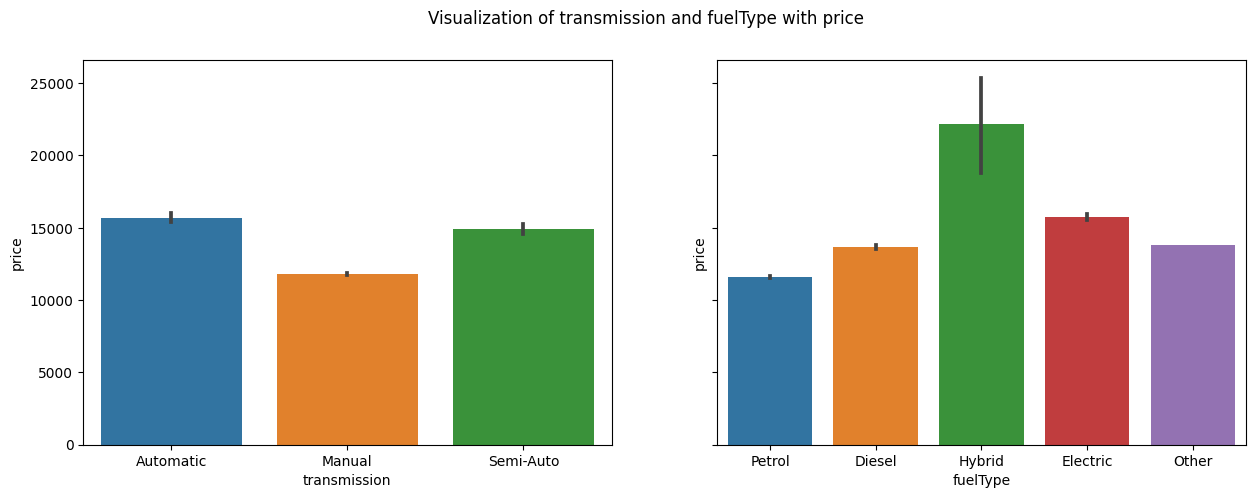

In [227]:
fig, axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Visualization of transmission and fuelType with price')
sns.barplot(x=carTransmission, y=carPrice, ax=axes[0])
sns.barplot(x=carFuelType, y=carPrice, ax=axes[1])


## From the below bar plot we can see that mustang ford car model has the higest price point

<Axes: xlabel='model', ylabel='price'>

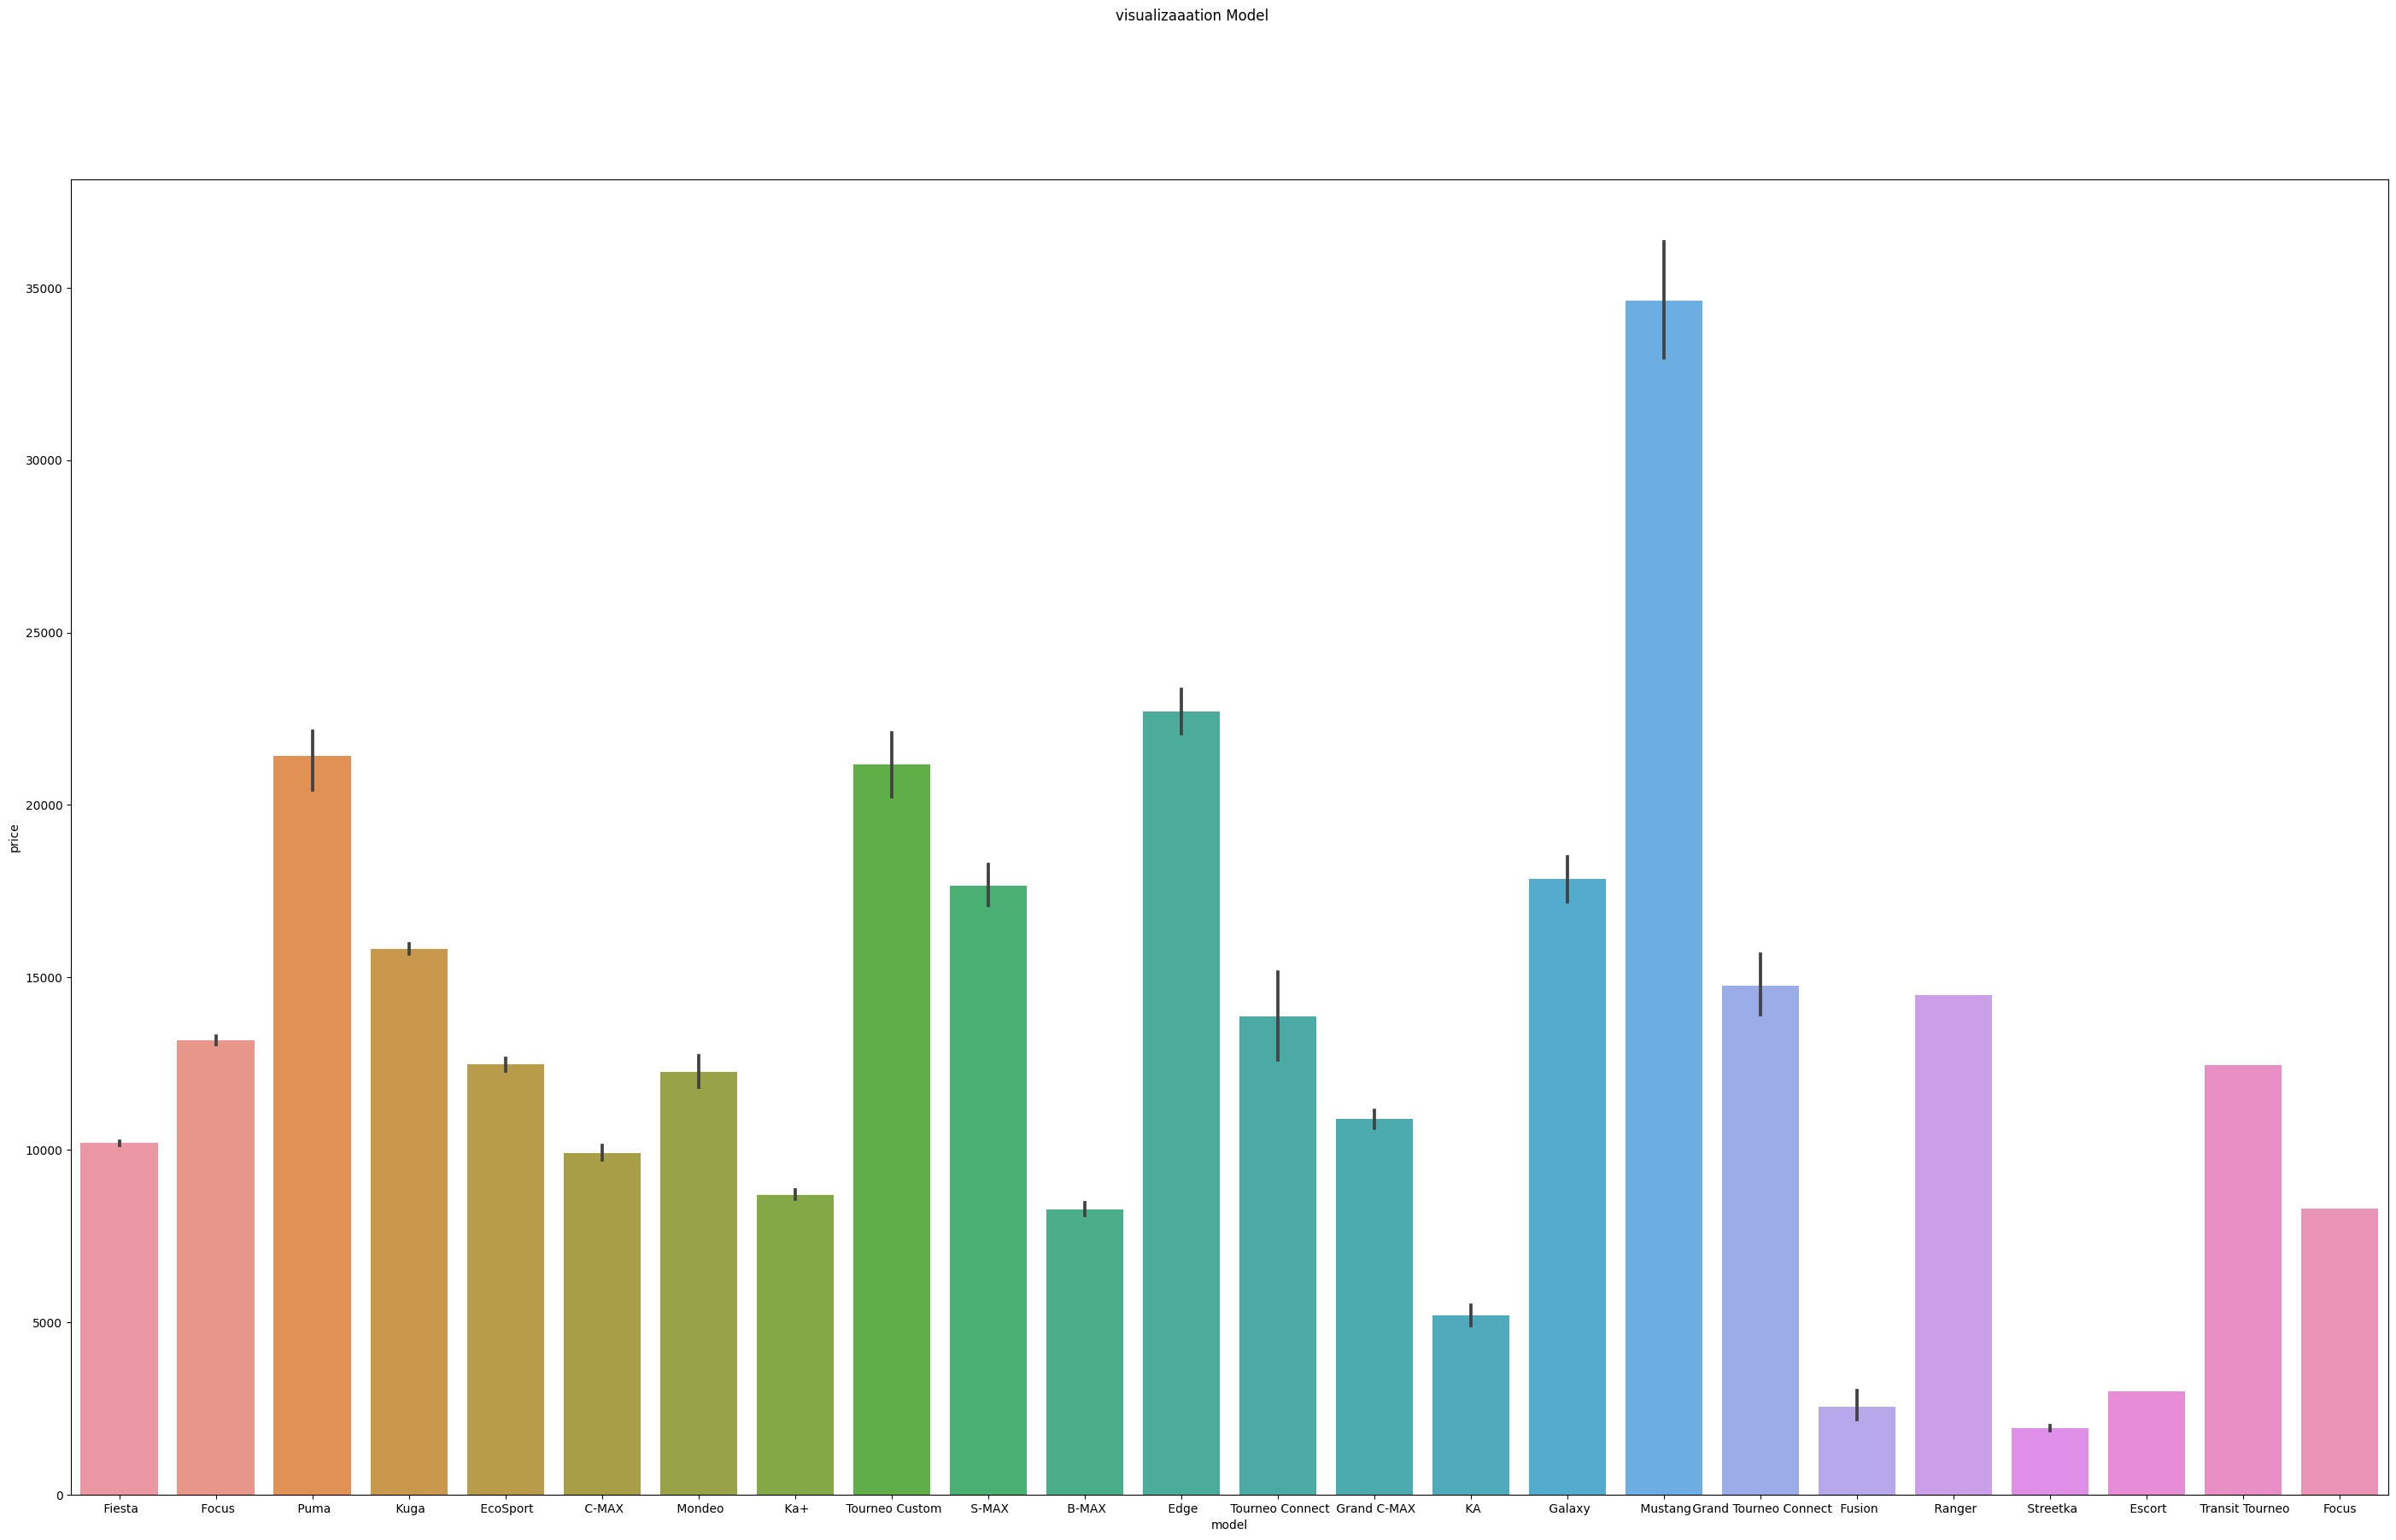

In [228]:
fig, axes = plt.subplots(1,1,figsize=(35,20),sharey=True)
fig.suptitle('visualizaaation Model')
sns.barplot(x=carModel, y=carPrice)


## Importing Label Encoder to transform Categorical value into numerical value

In [229]:
from sklearn.preprocessing import LabelEncoder

In [230]:
Encoder = LabelEncoder()

In [231]:
car_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


## Using label encoder setting Model value into unique individual number 

In [232]:
car_dataset['model'] = Encoder.fit_transform(car_dataset['model'])

In [233]:
car_dataset.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,6,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,6,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,5,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,5,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Using label encoder setting Transmission value into unique individual number 

In [234]:
car_dataset['transmission'] = Encoder.fit_transform(car_dataset['transmission'])


In [235]:
car_dataset.head(10) # Viewing the modified data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,Petrol,150,57.7,1.0
1,6,2018,14000,1,9083,Petrol,150,57.7,1.0
2,6,2017,13000,1,12456,Petrol,150,57.7,1.0
3,5,2019,17500,1,10460,Petrol,145,40.3,1.5
4,5,2019,16500,0,1482,Petrol,145,48.7,1.0
5,5,2015,10500,1,35432,Petrol,145,47.9,1.6
6,16,2019,22500,1,2029,Petrol,145,50.4,1.0
7,5,2017,9000,1,13054,Petrol,145,54.3,1.2
8,13,2019,25500,0,6894,Diesel,145,42.2,2.0
9,6,2018,10000,1,48141,Petrol,145,61.4,1.0


## Using label encoder setting FuelType  value into unique individual number 

In [236]:
car_dataset['fuelType'] = Encoder.fit_transform(car_dataset['fuelType'])

In [237]:
car_dataset.head(10)# Viewing the modified data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
5,5,2015,10500,1,35432,4,145,47.9,1.6
6,16,2019,22500,1,2029,4,145,50.4,1.0
7,5,2017,9000,1,13054,4,145,54.3,1.2
8,13,2019,25500,0,6894,0,145,42.2,2.0
9,6,2018,10000,1,48141,4,145,61.4,1.0


## Using Heat map to find the Corrleation between different attribute and the target column
### Lighter value indicates high corrleations 
### Darker value indicater low correlations

Text(0.5, 1.0, 'Corrleation with the columns')

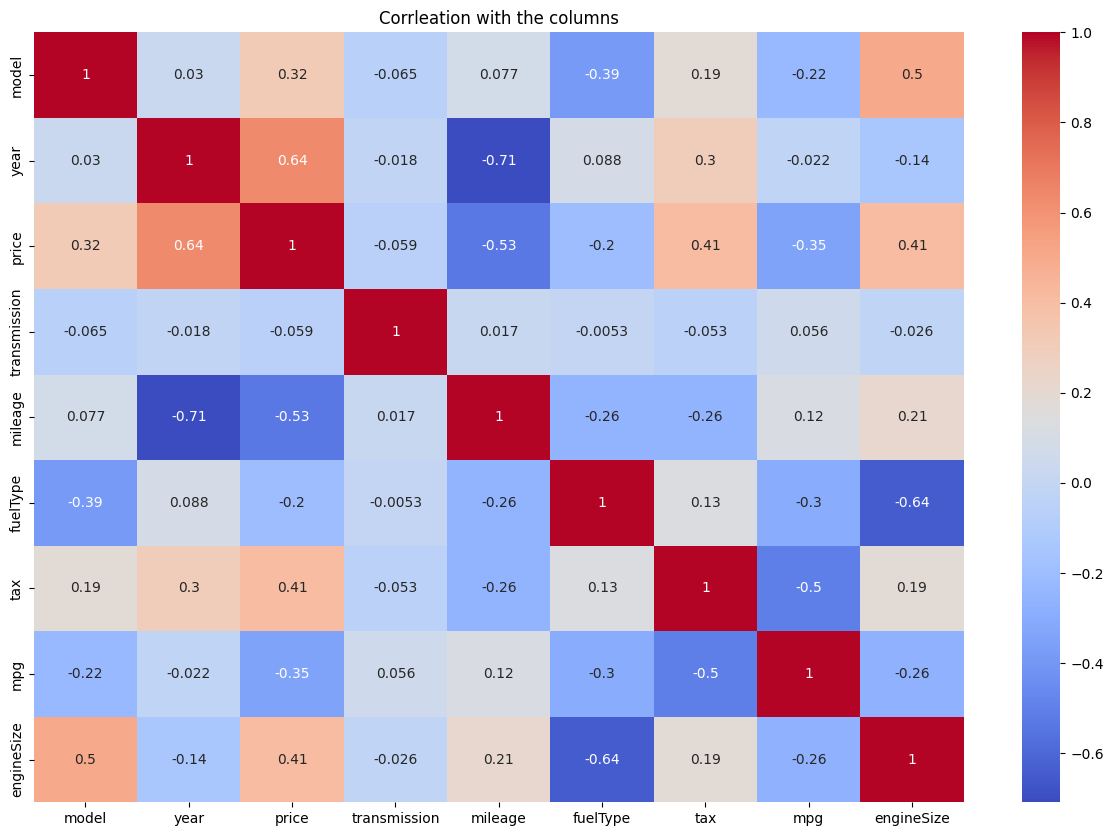

In [238]:
 #heat map
plt.figure(figsize=(15,10))
#plotting heat map for car data and find out their correlations with each other
sns.heatmap(car_dataset.corr(),annot=True, cmap="coolwarm")
plt.title("Corrleation with the columns")

## Printing the Corrleation value for the price column
## The below data arranges in accending order of the correleations
## The  most correlated attribute to the price of the car is its  year

In [239]:
car_dataset.corr()['price'].sort_values()

mileage        -0.530483
mpg            -0.346263
fuelType       -0.201974
transmission   -0.058603
model           0.316116
tax             0.405969
engineSize      0.411451
year            0.635715
price           1.000000
Name: price, dtype: float64

## plotting regression plot between highest correlated attribute year with price

<Axes: title={'center': 'Relation of Price and Year '}, xlabel='price', ylabel='year'>

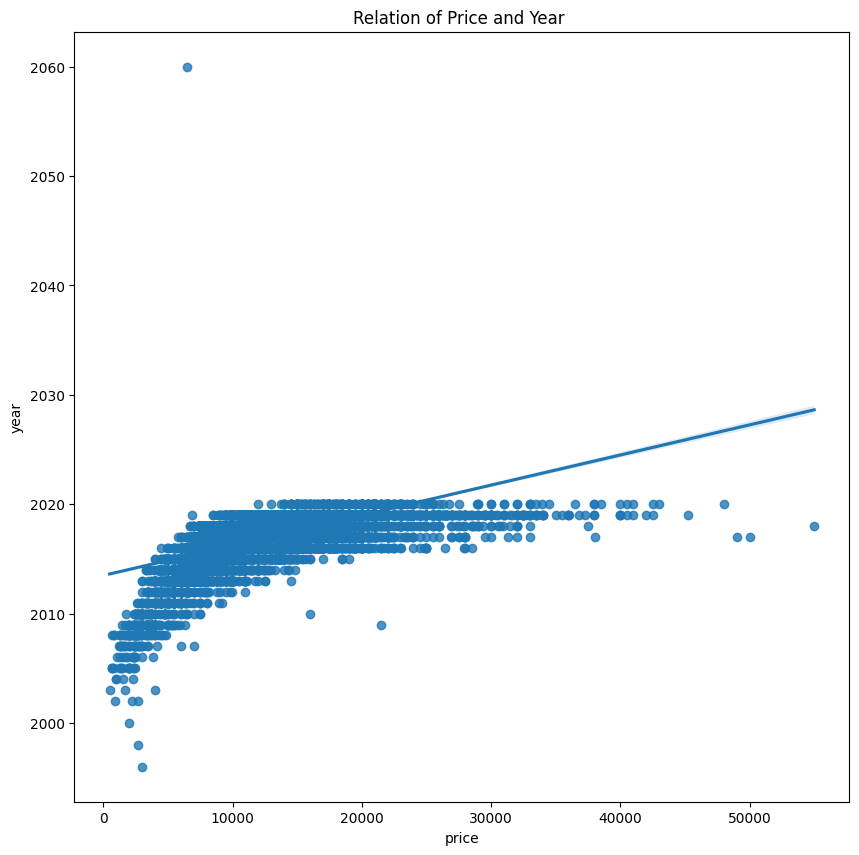

In [240]:
fig = plt.figure(figsize=(10,10))
plt.title('Relation of Price and Year ')
sns.regplot(x='price', y='year', data=car_dataset)

In [241]:
car_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6
17964,11,2018,8299,1,5007,4,145,57.7,1.2


##In this Project, the independent variables have been choosen as follows:
1. Year
2. Transmission
3. mileage
4. FuelType
5. tax
6. mpg
7. engineSize

Dependent variable :
1. Price

In [242]:
X = car_dataset.drop('price',axis=1)
Y = car_dataset['price']
print(X.shape, Y.shape)

(17812, 8) (17812,)


## displaying the X value

In [243]:

Y # displaying the Y value


0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17812, dtype: int64

## Splitting X and Y into 4 traning and testing dataset using train_test_split module

In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [245]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (12468, 8)
X_test (5344, 8)
Y_train (12468,)
Y_test (5344,)


In [246]:
from sklearn.preprocessing import StandardScaler
#loading standard scalar function

# Linear Regression (First Approached Method)

In [247]:
linearRegression = LinearRegression()

In [248]:
linearRegression.fit(X_train,Y_train)

LinearRegression()

## Linear Regression Traning data evaluation

In [249]:
Train_Linear_reg_Prediction = linearRegression.predict(X_train)


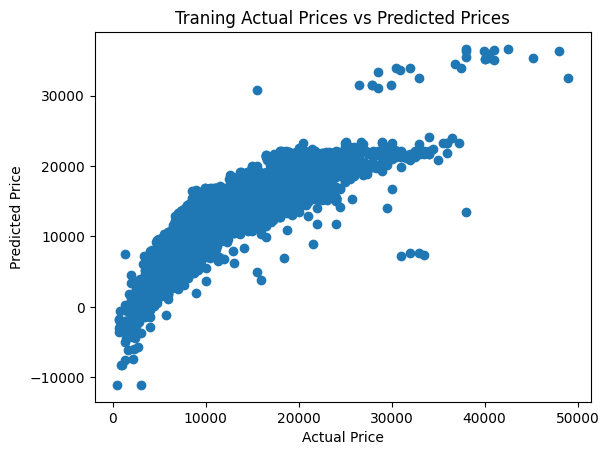

Traning_Linear_MAE 1736.189218369669
Traning_Linear_R2_score 0.7433279002699384
Traning_Linear Regression Accuracy:74.05300246623064


In [250]:
# Plotting The Y_train and Traning Data Prediction for viewing Actual and PRedicted Value
plt.scatter(Y_train, Train_Linear_reg_Prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Traning Actual Prices vs Predicted Prices')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

Linear_MAE = mean_absolute_error(Y_train, Train_Linear_reg_Prediction)
Linear_R2_score = r2_score(Y_train, Train_Linear_reg_Prediction)
print('Traning_Linear_MAE',Linear_MAE)
print('Traning_Linear_R2_score',Linear_R2_score)

########################################################### cross validation accuracy
Train_Linear_reg_Prediction_score = cross_val_score(linearRegression, X_train,Y_train, cv=4)
print('Traning_Linear Regression Accuracy:{}'.format(Train_Linear_reg_Prediction_score.mean()*100))


## Linear Regression Test data evaluation

In [251]:
Test_Linear_reg_Prediction = linearRegression.predict(X_test)

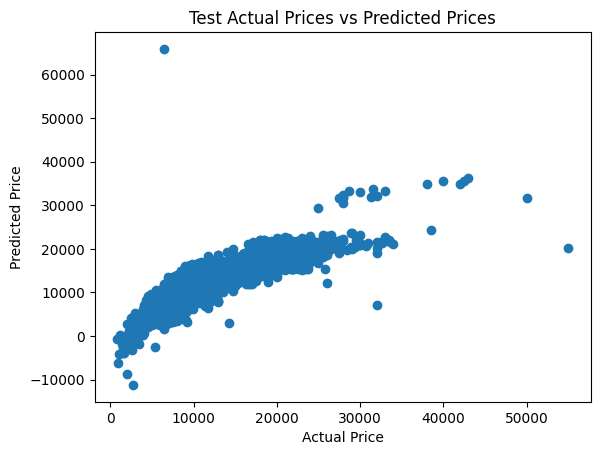

Test_Linear_MAE 1759.5112802511985
Test_Linear_R2_score 0.712274247512787
Test_Linear Regression Accuracy:70.3658844589357


In [252]:
# Plotting The Y_test and Test Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_test, Test_Linear_reg_Prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual Prices vs Predicted Prices')
plt.show()
######################################################################### Calculating Mean Absolute Error and R2 score
Linear_MAE = mean_absolute_error(Y_test, Test_Linear_reg_Prediction)
Linear_R2_score = r2_score(Y_test, Test_Linear_reg_Prediction)
print('Test_Linear_MAE',Linear_MAE)
print('Test_Linear_R2_score',Linear_R2_score)

######################################################################### cross validation accuracy

Test_Linear_reg_Prediction_score = cross_val_score(linearRegression, X_test,Y_test, cv=4)
print('Test_Linear Regression Accuracy:{}'.format(Test_Linear_reg_Prediction_score.mean()*100))



# Decision Tree Regressor (Second Approached Method)

## DecisionTreeRegressor Traning data evaluation

In [253]:
DecisionTreeRegressor = DecisionTreeRegressor()
DecisionTreeRegressor = DecisionTreeRegressor.fit(X_train,Y_train)
print(DecisionTreeRegressor)

DecisionTreeRegressor()


In [254]:
Traning_DecisionTreeRegressor_Prediction = DecisionTreeRegressor.predict(X_train)

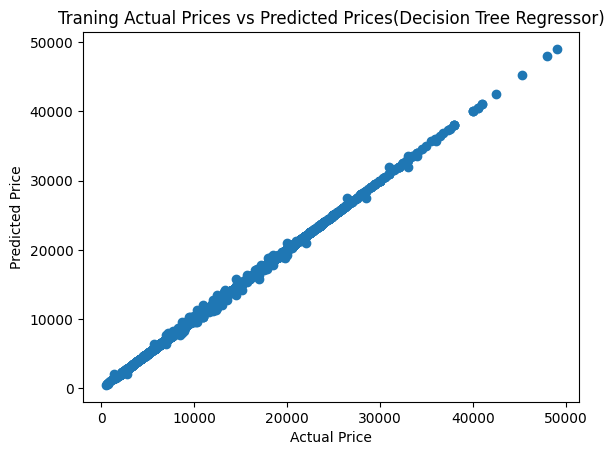

Traning_DecisionTreeRegressor_MAE 5.923136562934444
Traning_DecisionTreeRegressor_R2_score 0.9998328665557021
Traning_DecisionTreeRegressor_Prediction_score Accuracy:88.20564630846542


In [255]:
# Plotting The Y_train and Test Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_train, Traning_DecisionTreeRegressor_Prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Traning Actual Prices vs Predicted Prices(Decision Tree Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

DecisionTreeRegressor_MAE = mean_absolute_error(Y_train, Traning_DecisionTreeRegressor_Prediction)
DecisionTreeRegressor_R2_score = r2_score(Y_train, Traning_DecisionTreeRegressor_Prediction)
print('Traning_DecisionTreeRegressor_MAE',DecisionTreeRegressor_MAE)
print('Traning_DecisionTreeRegressor_R2_score',DecisionTreeRegressor_R2_score)

######################################################################### Calculating Accuracy of the model

Traning_DecisionTree_Reg_Prediction_score = cross_val_score(DecisionTreeRegressor, X_train,Y_train, cv=4)
print('Traning_DecisionTreeRegressor_Prediction_score Accuracy:{}'.format(Traning_DecisionTree_Reg_Prediction_score.mean()*100))




## DecisionTreeRegressor Test data evaluation

In [256]:
Test_DecisionTreeRegressor_Prediction = DecisionTreeRegressor.predict(X_test)

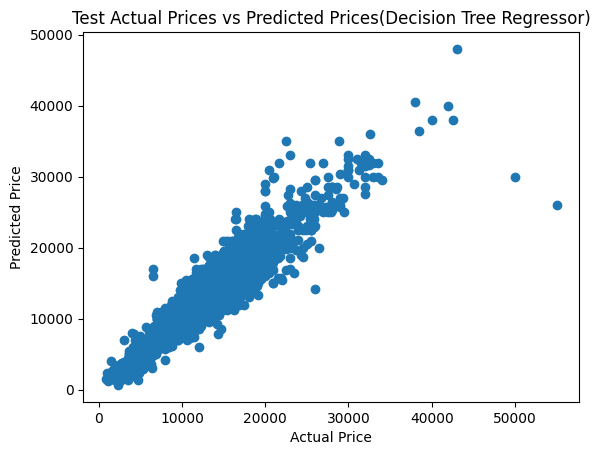

Test_DecisionTreeRegressor_MAE 1090.411770209581
Test_DecisionTreeRegressor_R2_score 0.885859593997586
Test_DecisionTree_Prediction_score Accuracy:84.89456651545783


In [257]:
# Plotting The Y_test and Test Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_test, Test_DecisionTreeRegressor_Prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual Prices vs Predicted Prices(Decision Tree Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

DecisionTreeRegressor_MAE = mean_absolute_error(Y_test, Test_DecisionTreeRegressor_Prediction)
DecisionTreeRegressor_R2_score = r2_score(Y_test, Test_DecisionTreeRegressor_Prediction)
print('Test_DecisionTreeRegressor_MAE',DecisionTreeRegressor_MAE)
print('Test_DecisionTreeRegressor_R2_score',DecisionTreeRegressor_R2_score)

######################################################################### Calculating Accuracy of the model


Test_DecisionTree_Reg_Prediction_score = cross_val_score(DecisionTreeRegressor, X_test,Y_test, cv=4)
print('Test_DecisionTree_Prediction_score Accuracy:{}'.format(Test_DecisionTree_Reg_Prediction_score.mean()*100))



# Extreme Gradient Boosting Regression (Third Approached Method)

In [258]:
XGB_Reg = XGBRegressor()
XGB_Reg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## XGB Regression Traning data evaluation

In [259]:
Traning_XGB_Reg_predict = XGB_Reg.predict(X_train)

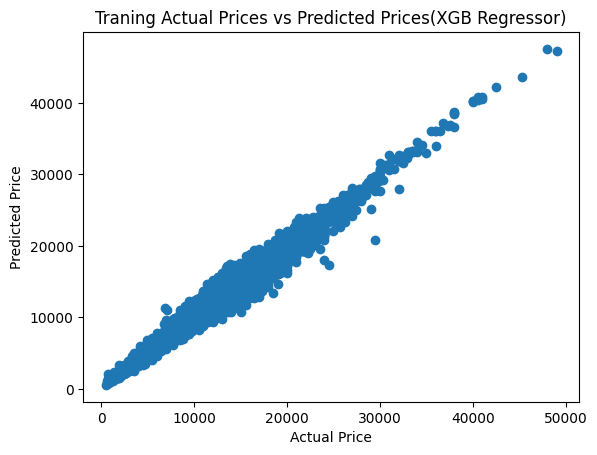

TraningXGB_Reg_MAE 633.3282392965053
TraningXGB_Reg_R2_score 0.9676895065899467
Traning_XGB_Reg_prediction_score Accuracy:93.23206855389076


In [260]:
# Plotting The Y_train and Traning Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_train, Traning_XGB_Reg_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Traning Actual Prices vs Predicted Prices(XGB Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

XGB_Reg_MAE = mean_absolute_error(Y_train, Traning_XGB_Reg_predict)
XGB_Reg_R2_score = r2_score(Y_train, Traning_XGB_Reg_predict)
print('TraningXGB_Reg_MAE',XGB_Reg_MAE)
print('TraningXGB_Reg_R2_score',XGB_Reg_R2_score)

######################################################################### cross validation accuracy

Traning_XGB_Reg_prediction_score = cross_val_score(XGB_Reg, X_train,Y_train, cv=4)
print('Traning_XGB_Reg_prediction_score Accuracy:{}'.format(Traning_XGB_Reg_prediction_score.mean()*100))


## XGB Regression Test data evaluation

In [261]:
Test_XGB_Reg_predict = XGB_Reg.predict(X_test)

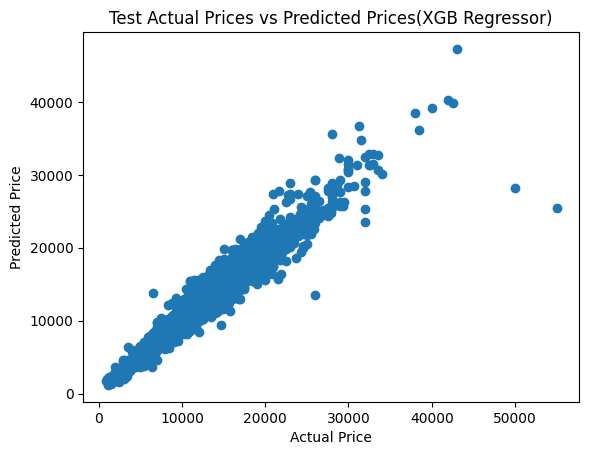

Test XGB_Reg_MAE 819.36873443969
Test XGB_Reg_R2_score 0.9334834261571151
Test_XGB_Reg_prediction_score Accuracy:91.95782588743823


In [262]:
# Plotting The Y_test and Test Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_test, Test_XGB_Reg_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual Prices vs Predicted Prices(XGB Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

XGB_Reg_MAE = mean_absolute_error(Y_test, Test_XGB_Reg_predict)
XGB_Reg_R2_score = r2_score(Y_test, Test_XGB_Reg_predict)
print('Test XGB_Reg_MAE',XGB_Reg_MAE)
print('Test XGB_Reg_R2_score',XGB_Reg_R2_score)

######################################################################### cross validation accuracy

Test_XGB_Reg_prediction_score = cross_val_score(XGB_Reg, X_test,Y_test, cv=4)
print('Test_XGB_Reg_prediction_score Accuracy:{}'.format(Test_XGB_Reg_prediction_score.mean()*100))


# Lasso Regression (Fourth Approached Method)

In [263]:
from sklearn.linear_model import LassoCV

In [264]:
Lass_reg_model = Lasso(alpha=0.1)
Lass_reg_model.fit(X_train,Y_train)

Lasso(alpha=0.1)

## Lasso Regression Traning data evaluation

In [265]:
Traning_Lass_reg_model_predict = Lass_reg_model.predict(X_train)


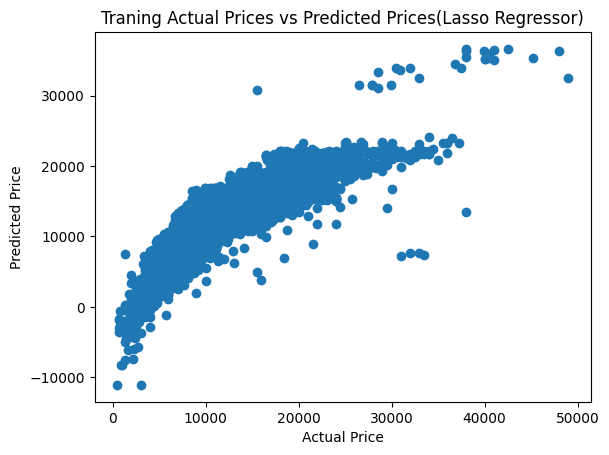

Traning Lasso_Reg_MAE 1736.1693251826284
Traning Lasso_Reg_R2_score 0.7433278915823531
Traning Lasso_Reg_Prediction_score Accuracy:74.05286528750406


In [266]:
# Plotting The Y_train and Traning Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_train, Traning_Lass_reg_model_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Traning Actual Prices vs Predicted Prices(Lasso Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

Lasso_Reg_MAE = mean_absolute_error(Y_train, Traning_Lass_reg_model_predict)
Lasso_Reg_R2_score = r2_score(Y_train, Traning_Lass_reg_model_predict)
print('Traning Lasso_Reg_MAE',Lasso_Reg_MAE)
print('Traning Lasso_Reg_R2_score',Lasso_Reg_R2_score)

######################################################################### cross validation accuracy

Traning_Lasso_Reg_Prediction_score = cross_val_score(Lass_reg_model, X_train,Y_train, cv=4)
print('Traning Lasso_Reg_Prediction_score Accuracy:{}'.format(Traning_Lasso_Reg_Prediction_score.mean()*100))



## Lasso Regression Test data evaluation

In [267]:
Test_Lass_reg_model_predict = Lass_reg_model.predict(X_test)


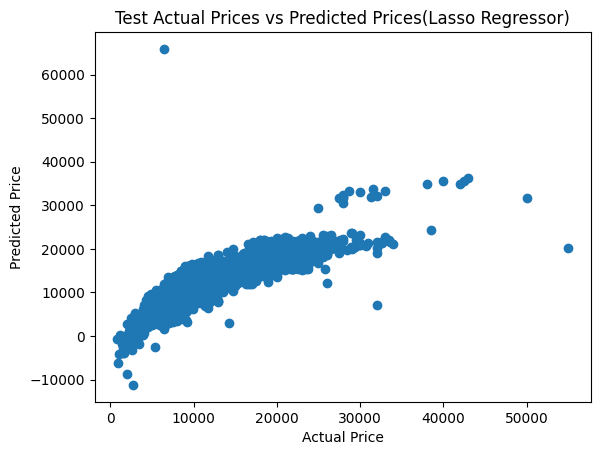

Test Lasso_MAE 1759.4859187685254
Test Lasso_R2_score 0.7122783094022858
Test Lasso_Prediction_score Accuracy:70.36602782758364


In [268]:
# Plotting The Y_test and Test Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_test, Test_Lass_reg_model_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual Prices vs Predicted Prices(Lasso Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

Lasso_Reg_MAE = mean_absolute_error(Y_test, Test_Lass_reg_model_predict)
Lasso_Reg_R2_score = r2_score(Y_test, Test_Lass_reg_model_predict)
print('Test Lasso_MAE',Lasso_Reg_MAE)
print('Test Lasso_R2_score',Lasso_Reg_R2_score)

######################################################################### cross validation accuracy

Test_Lasso_Reg_Prediction_score = cross_val_score(Lass_reg_model, X_test,Y_test, cv=4)
print('Test Lasso_Prediction_score Accuracy:{}'.format(Test_Lasso_Reg_Prediction_score.mean()*100))



# Random Forest Regressor (Fifth Approached Method)

In [269]:
RandomForestRegressor = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42)


In [270]:
RandomForestRegressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, random_state=42)

## Random Forest Regressor Traning data evaluation

In [271]:
Traning_RF_prediction = RandomForestRegressor.predict(X_train)


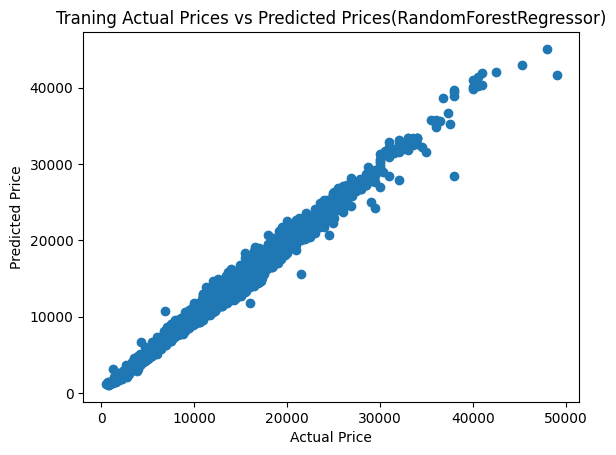

Traning_RandomForest_Reg_MAE 380.42897084604897
Traning_RandomForest_Reg_R2_score 0.9872348586875402
Traning_RandomForest_Prediction_score Accuracy:92.49424869816592


In [272]:
# Plotting The Y_train and Traning Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_train, Traning_RF_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Traning Actual Prices vs Predicted Prices(RandomForestRegressor)',)
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

Traning_RandomForest_Reg_MAE = mean_absolute_error(Y_train, Traning_RF_prediction)
Traning_RandomForest_Reg_R2_score = r2_score(Y_train, Traning_RF_prediction)
print('Traning_RandomForest_Reg_MAE',Traning_RandomForest_Reg_MAE)
print('Traning_RandomForest_Reg_R2_score',Traning_RandomForest_Reg_R2_score)

######################################################################### cross validation accuracy

Traning_RandomForest_Reg_Prediction_score = cross_val_score(RandomForestRegressor, X_train,Y_train, cv=4)
print('Traning_RandomForest_Prediction_score Accuracy:{}'.format(Traning_RandomForest_Reg_Prediction_score.mean()*100))


## Random Forest Regressor Test data evaluation

In [273]:
Test_RF_prediction = RandomForestRegressor.predict(X_test)


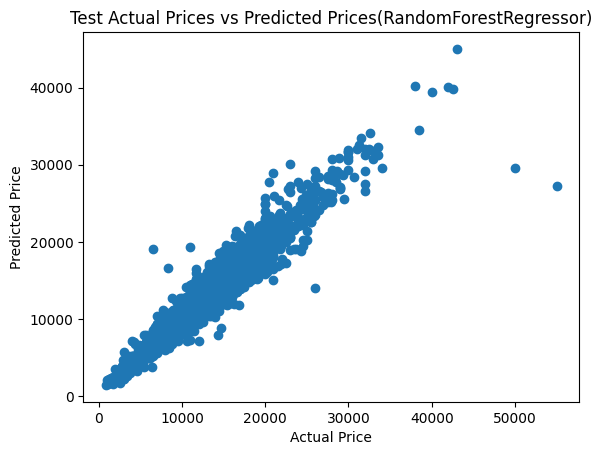

Test_RandomForest_Reg_MAE 863.6445828025044
Test_RandomForest_Reg_R2_score 0.926789625935636
Test_RandomForest_Prediction_score Accuracy:91.2122488816008


In [274]:
# Plotting The Y_test and Test Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_test, Test_RF_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual Prices vs Predicted Prices(RandomForestRegressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

Test_RandomForest_Reg_MAE = mean_absolute_error(Y_test, Test_RF_prediction)
Traning_RandomForest_Reg_R2_score = r2_score(Y_test, Test_RF_prediction)
print('Test_RandomForest_Reg_MAE',Test_RandomForest_Reg_MAE)
print('Test_RandomForest_Reg_R2_score',Traning_RandomForest_Reg_R2_score)

######################################################################### cross validation accuracy

Test_RandomForest_Reg_Prediction_score = cross_val_score(RandomForestRegressor, X_test,Y_test, cv=4)
print('Test_RandomForest_Prediction_score Accuracy:{}'.format(Test_RandomForest_Reg_Prediction_score.mean()*100))



## importing XGBRegressor again to preform feature extration and select top 5 features

In [275]:
XGB  = XGBRegressor() 

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [277]:
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [278]:
print(XGB.feature_importances_) # Extracting features importances from train dataset

[0.06086392 0.36069545 0.00977698 0.01762632 0.00566805 0.01218762
 0.03592192 0.49725968]


## This code selects 5 most important features by analyzing the feature importances obtained by XXGB.feature_importances_

In [279]:
importantFeatures = XGB.feature_importances_.argsort()[::1][:5] 


# Extracting columns name from traning dataset on basis of importantFeatures 

In [280]:
feature_name = X_train.columns[importantFeatures] 


In [281]:
feature_importances = [XGB.feature_importances_[i] for i in importantFeatures]

In [282]:
print(feature_name) ## printing feature name 
print(importantFeatures) # printing importantFeatures

Index(['fuelType', 'transmission', 'tax', 'mileage', 'mpg'], dtype='object')
[4 2 5 3 6]


## This code selects 5 most important features by analyzing the feature importances obtained by XXGB.feature_importances_

Text(0.5, 1.0, 'Features importances')

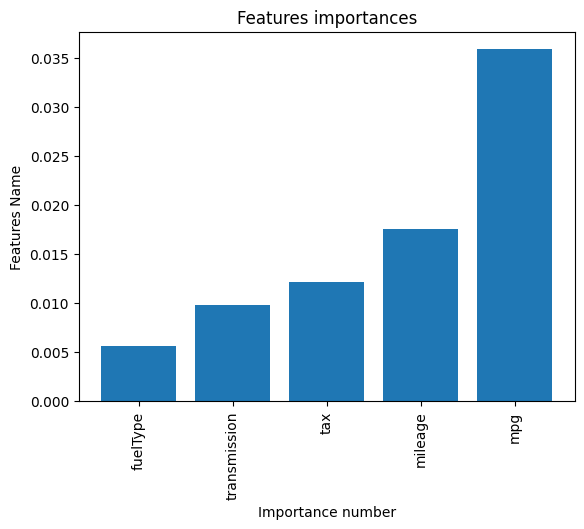

In [283]:
# plotting a bar chart for feature importances
plt.bar(range(5),feature_importances)

plt.xticks(range(5), feature_name, rotation=90)
# setting title name and importance number
plt.ylabel('Features Name')
plt.xlabel('Importance number')
plt.title('Features importances')

In [284]:
car_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6
17964,11,2018,8299,1,5007,4,145,57.7,1.2


## Removing Transmission since it has very low importances in the features

In [285]:
# Before Removing Dupicate value
print('Before removing duplicate values', car_dataset.duplicated().sum())


Before removing duplicate values 0


In [286]:
FeatureCar_data = car_dataset.drop(['model','year', 'engineSize'], axis=1)

In [287]:
X_final = FeatureCar_data.drop(columns='price')
Y_final = FeatureCar_data['price']

In [288]:
X_final #Data after Feature Extraction

,transmission,mileage,fuelType,tax,mpg
0,0,15944,4,150,57.7
1,1,9083,4,150,57.7
2,1,12456,4,150,57.7
3,1,10460,4,145,40.3
4,0,1482,4,145,48.7
...,...,...,...,...,...
17961,1,16700,4,150,47.1
17962,1,40700,4,30,57.7
17963,1,7010,0,20,67.3
17964,1,5007,4,145,57.7


In [289]:
Y_final # price data

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17812, dtype: int64

## Preforming XGBooster on analyzed featured data for traning data

## Loading the data into new X and Y to test 

In [290]:
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

In [291]:
XGB.fit(X_train_F,Y_train_F)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Preforming XGBooster on analyzed featured data for testing data

In [292]:
XGB_Final_Test_Pred = XGB.predict(X_test_F)


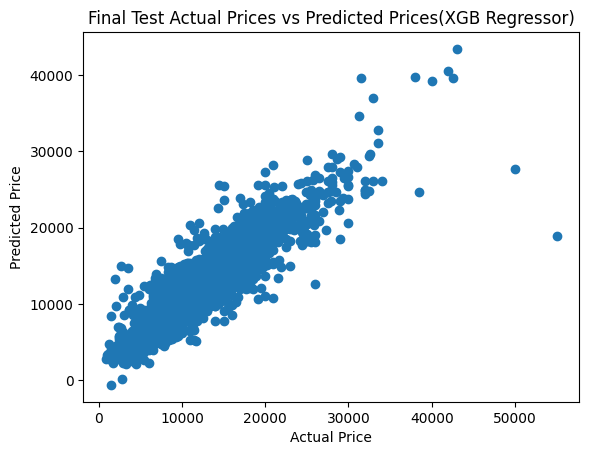

F_TestXGB_Reg_MAE 1407.7714870761254
F_TestXGB_Reg_R2_score 0.817399303761202
XGB_Final_Test_Predion_score Accuracy:77.51011328457776


In [293]:
# Plotting The Y_train and Traning Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_test_F, XGB_Final_Test_Pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Final Test Actual Prices vs Predicted Prices(XGB Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

XGB_Reg_MAE = mean_absolute_error(Y_test_F, XGB_Final_Test_Pred)
XGB_Reg_R2_score = r2_score(Y_test_F, XGB_Final_Test_Pred)
print('F_TestXGB_Reg_MAE',XGB_Reg_MAE)
print('F_TestXGB_Reg_R2_score',XGB_Reg_R2_score)

######################################################################### cross validation accuracy

XGB_Final_Test_Predion_score = cross_val_score(XGB_Reg, X_test_F,Y_test_F, cv=4)
print('XGB_Final_Test_Predion_score Accuracy:{}'.format(XGB_Final_Test_Predion_score.mean()*100))


# Preforming XGBooster on analyzed featured data for Traning data

In [294]:
XGB_Final_Train_Pred = XGB.predict(X_train_F)


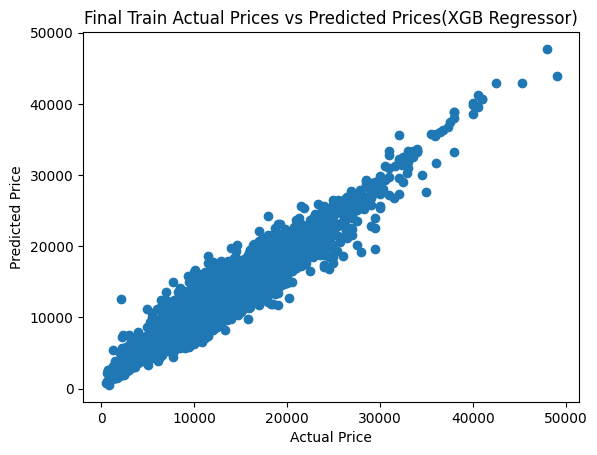

F_TraningXGB_Reg_MAE 1109.118047269369
F_TraningXGB_Reg_R2_score 0.8991275408709366
XGB_Final_Train_Predion_score Accuracy:82.1777460913848


In [295]:
# Plotting The Y_train and Traning Data Prediction for viewing Actual and Predicted Value

plt.scatter(Y_train_F, XGB_Final_Train_Pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Final Train Actual Prices vs Predicted Prices(XGB Regressor)')
plt.show()

######################################################################### Calculating Mean Absolute Error and R2 score

XGB_Reg_MAE = mean_absolute_error(Y_train_F, XGB_Final_Train_Pred)
XGB_Reg_R2_score = r2_score(Y_train_F, XGB_Final_Train_Pred)
print('F_TraningXGB_Reg_MAE',XGB_Reg_MAE)
print('F_TraningXGB_Reg_R2_score',XGB_Reg_R2_score)
######################################################################### cross validation accuracy

XGB_Final_Train_Predion_score = cross_val_score(XGB_Reg, X_train_F,Y_train_F, cv=4)
print('XGB_Final_Train_Predion_score Accuracy:{}'.format(XGB_Final_Train_Predion_score.mean()*100))
